In [1]:
import myanfis
import pandas as pd
import numpy as np
import warnings
import sys
sys.maxsize
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import tensorflow as tf
import random
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls '/content/gdrive/MyDrive/sepsis'

no_sepsis  sepsis


In [4]:
columns = pd.read_csv('/content/gdrive/MyDrive/sepsis/sepsis/1.csv').columns
columns

Index(['heart_rate', 'bp_systolic', 'bp_diastolic', 'map', 'resp', 'temp',
       'spo2', 'fio2', 'wbc', 'bun', 'bilirubin', 'creatinine', 'lactate',
       'platelets', 'ph', 'pco2', 'po2', 'bicarbonate', 'hemoglobin',
       'hematocrit', 'potassium', 'chloride', 'gcs', 'age', 'sirs', 'qsofa',
       'sepsis_icd'],
      dtype='object')

In [5]:
#get random patients from data file
randomlist_sepsis = []
randomlist_nosepsis = []
for i in range(0,300):
    n  = random.randint(1,1000)
    randomlist_sepsis.append(n)
    n = random.randint(1,1000)
    randomlist_nosepsis.append(n)

In [6]:
data = np.zeros((600,27))
warnings.filterwarnings('ignore')
count=0
for i in randomlist_nosepsis:
    file_path = '/content/gdrive/MyDrive/sepsis/no_sepsis/' + str(i) + '.csv'
    nosepsis_data = pd.read_csv(file_path)
    mean_data = np.nanmean(nosepsis_data, axis=0)
    data[count]=mean_data
    count+=1
    

for i in randomlist_sepsis:
    file_path = '/content/gdrive/MyDrive/sepsis/sepsis/' + str(i) + '.csv'
    sepsis_data = pd.read_csv(file_path)
    mean_data = np.nanmean(sepsis_data, axis=0)
    data[count]= mean_data
    count+=1

df = pd.DataFrame(data=data, columns=columns)
df

,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,fio2,wbc,bun,...,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sirs,qsofa,sepsis_icd
0,106.681818,101.727273,50.136364,67.515155,16.136364,37.638095,96.000000,NaN,8.800000,8.666667,...,26.666667,8.586957,21.800000,4.195652,102.666667,14.619048,48.61,0.173913,0.086957,0.0
1,65.909091,119.727273,56.363636,71.545455,15.863636,35.921717,99.500000,NaN,4.050000,37.000000,...,21.000000,10.000000,27.905263,5.021053,107.684211,15.000000,63.64,0.000000,0.000000,0.0
2,66.166667,116.500000,52.916667,73.333333,18.041667,36.013888,98.208333,NaN,14.780000,30.400000,...,24.400000,11.640000,34.550000,4.150000,99.200000,11.875000,60.32,0.041667,0.083333,0.0
3,104.583333,168.625000,76.166667,111.111125,14.500000,36.679294,99.916667,NaN,1.852632,30.631579,...,18.000000,10.400000,29.200000,5.157895,112.368421,15.000000,42.74,0.791667,0.000000,0.0
4,84.818182,129.000000,60.000000,84.500000,17.500000,37.075757,95.409091,NaN,19.900000,11.000000,...,24.000000,10.712500,31.300000,4.162500,114.000000,13.260870,77.28,0.333333,0.083333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,90.818182,104.380952,63.809524,79.666667,20.136364,36.476190,96.818182,46.785714,32.433333,38.055556,...,15.000000,12.683333,37.411111,4.350000,111.888889,13.714286,80.62,0.954545,0.272727,1.0
596,97.083333,177.625000,81.416667,93.375000,26.291667,37.907407,99.041667,50.000000,20.869565,32.000000,...,22.347826,9.508696,26.626087,3.930435,103.652174,10.333333,64.21,0.958333,0.958333,1.0
597,65.272727,99.000000,55.909091,64.681818,15.181818,36.520202,97.954545,66.666667,25.463636,128.727273,...,17.681818,12.027273,37.595455,4.022727,95.954545,13.363636,66.22,0.045455,0.227273,1.0
598,79.666667,107.583333,44.500000,59.583333,18.125000,36.809524,97.541667,NaN,3.357143,17.714286,...,23.571429,9.828571,28.300000,3.571429,111.142857,15.000000,69.99,0.083333,0.000000,1.0


In [10]:
minMaxScaler = MinMaxScaler()
df2 =df.copy()

col = ['heart_rate','wbc','bp_systolic','resp','lactate','creatinine','sepsis_icd']

df2[col]

,heart_rate,wbc,bp_systolic,resp,lactate,creatinine,sepsis_icd
0,106.681818,8.800000,101.727273,16.136364,NaN,0.566667,0.0
1,65.909091,4.050000,119.727273,15.863636,NaN,1.100000,0.0
2,66.166667,14.780000,116.500000,18.041667,4.910000,1.770000,0.0
3,104.583333,1.852632,168.625000,14.500000,NaN,0.931579,0.0
4,84.818182,19.900000,129.000000,17.500000,NaN,0.700000,0.0
...,...,...,...,...,...,...,...
595,90.818182,32.433333,104.380952,20.136364,1.921053,2.077778,1.0
596,97.083333,20.869565,177.625000,26.291667,1.200000,1.334783,1.0
597,65.272727,25.463636,99.000000,15.181818,1.000000,3.745455,1.0
598,79.666667,3.357143,107.583333,18.125000,1.500000,0.500000,1.0


In [11]:
df2[col] = minMaxScaler.fit_transform(df[col])

In [13]:
df2 = df2[col].sample(frac = 1)

In [14]:
mean_value= np.nanmean(df2['lactate'])
df2['lactate'] = df2['lactate'].fillna(mean_value)

In [15]:
X = df2.iloc[:,:6]
Y = df2['sepsis_icd']

x = df2.iloc[:,:6]
y = df2['sepsis_icd']

In [25]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))




In [17]:
param = myanfis.fis_parameters(
    n_input=6,
    n_memb=6,
    batch_size=5,
    memb_func='gaussian',
    optimizer='adam',
    loss=tf.keras.losses.MeanAbsoluteError(),
    n_epochs=15
)

In [18]:
kfold = KFold(n_splits=5)
histories=[]

for train_index, test_index in kfold.split(x):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    fis = myanfis.ANFIS(n_input = param.n_input,
    n_memb= param.n_memb,
    batch_size=param.batch_size,
    memb_func=param.memb_func,
    name='firstAnfis')


    fis.model.compile(optimizer=param.optimizer,
                      loss=param.loss,
                      metrics=['mae', 'accuracy', recall_m, precision_m, f1_m])
    
    
        
    history = fis.fit(X_train, Y_train,
                  epochs=param.n_epochs,
                  batch_size=param.batch_size,
                  validation_data = (X_test, Y_test),
                  )
    
    
    histories.append(history)
    
    

Epoch 1/15
96/96 [==============================] - 3s 15ms/step - loss: 0.4993 - mae: 0.4993 - accuracy: 0.4979 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.4825 - val_mae: 0.4825 - val_accuracy: 0.5083 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/15
96/96 [==============================] - 1s 11ms/step - loss: 0.4896 - mae: 0.4896 - accuracy: 0.4979 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.4723 - val_mae: 0.4723 - val_accuracy: 0.5083 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/15
96/96 [==============================] - 1s 12ms/step - loss: 0.4800 - mae: 0.4800 - accuracy: 0.4979 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.4605 - val_mae: 0.4605 - val_accuracy: 0.5083 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/15
96/96 [===================

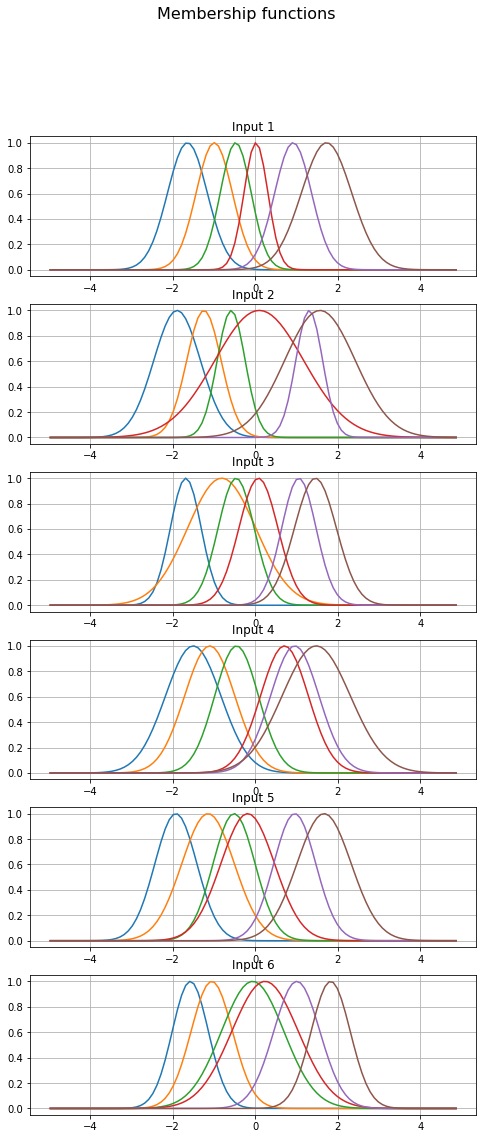

In [19]:
fis.plotmfs()

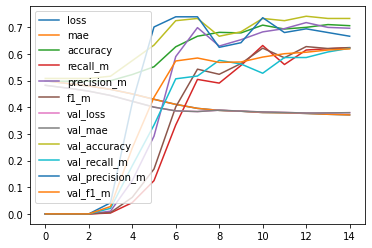

In [20]:
pd.DataFrame(histories[0].history).plot()

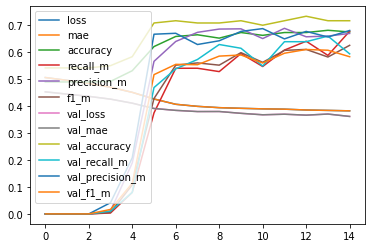

In [21]:
pd.DataFrame(histories[1].history).plot()

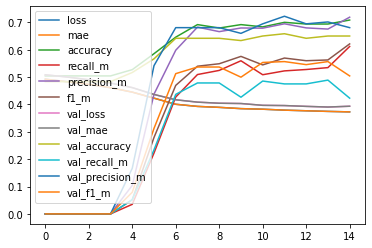

In [22]:
pd.DataFrame(histories[2].history).plot()

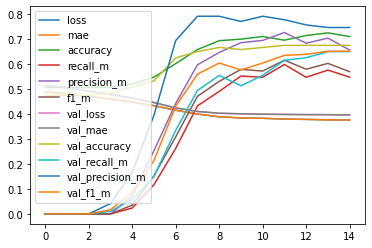

In [23]:
pd.DataFrame(histories[3].history).plot()

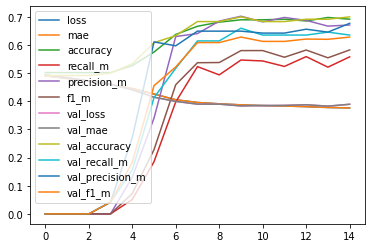

In [24]:
pd.DataFrame(histories[4].history).plot()